# will5000

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
tf.Session(config=config)

D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import mpld3
mpld3.enable_notebook()

In [4]:
data_dir = 'D:/python_code/data/stock/willshire'
fname = os.path.join(data_dir, 'will5000.csv')
df = pd.read_csv(fname)
df['observation_date'] = pd.to_datetime(df["observation_date"])
df_idx = df.set_index(["observation_date"], drop=True)
df_idx.head(5)

Close  diff
observation_date             
1980-01-02         1.86 -0.04
1980-01-04         1.88  0.02
1980-01-07         1.89  0.01
1980-01-08         1.93  0.04
1980-01-09         1.93  0.00

In [5]:
#把順序調換
df_idx = df_idx.sort_index(axis=0, ascending=False)
df_idx = df_idx.iloc[::-1]

In [6]:
df_idx.head(5)

Close  diff
observation_date             
1980-01-02         1.86 -0.04
1980-01-04         1.88  0.02
1980-01-07         1.89  0.01
1980-01-08         1.93  0.04
1980-01-09         1.93  0.00

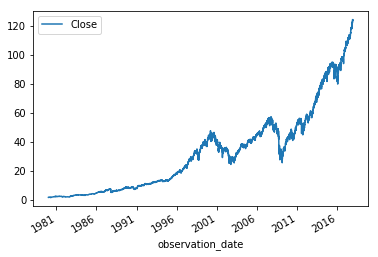

In [7]:
data = df_idx
data.plot(y='Close')

In [8]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("total data days:",days)
print("Total data: %d years"%years)
print("80 percent data = 1980 to %d"%(1980 + int(0.8*years)))
print(diff)

total data days: 13876.0
Total data: 38 years
80 percent data = 1980 to 2010
1198886400000000000 nanoseconds


In [9]:
#切割訓練與測試資料
split_date = pd.Timestamp('01-01-2010')

train = data.loc[:split_date]
test = data.loc[split_date:]
test_date = test.index
test_date = pd.to_datetime(test_date)


In [10]:
# 資料正規化

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [11]:
#without sc
#train_sc = train
#test_sc = test

In [12]:
train_sc.shape

(7570, 2)

In [13]:
train_sc_df = pd.DataFrame(train_sc,index=train.index,columns=train.columns)
test_sc_df = pd.DataFrame(test_sc,index=test.index,columns=test.columns)



In [14]:
train_sc_df

Close      diff
observation_date                    
1980-01-02        0.002688  0.490862
1980-01-04        0.003046  0.498695
1980-01-07        0.003225  0.497389
1980-01-08        0.003942  0.501305
1980-01-09        0.003942  0.496084
1980-01-10        0.004300  0.498695
1980-01-11        0.004300  0.496084
1980-01-14        0.004479  0.497389
1980-01-15        0.004659  0.497389
1980-01-16        0.004659  0.496084
1980-01-17        0.004659  0.496084
1980-01-18        0.004659  0.496084
1980-01-21        0.005017  0.498695
1980-01-22        0.004838  0.494778
1980-01-23        0.005375  0.500000
1980-01-24        0.005555  0.497389
1980-01-25        0.005375  0.494778
1980-01-28        0.005913  0.500000
1980-01-29        0.005555  0.493473
1980-01-30        0.006092  0.500000
1980-01-31        0.005734  0.493473
1980-02-01        0.006092  0.498695
1980-02-04        0.005913  0.494778
1980-02-05        0.005913  0.496084
1980-02-06        0.006271  0.498695
1980-02-07        0.006450  0.497389
1980-02-08        0.006988  0.500000
1980-02-11        0.006809  0.494778
1980-02-12        0.006988  0.497389
1980-02-13        0.007167  0.497389
...                    ...       ...
2009-11-18        0.745744  0.492167
2009-11-19        0.734635  0.415144
2009-11-20        0.732127  0.477807
2009-11-23        0.741982  0.567885
2009-11-24        0.741265  0.490862
2009-11-25        0.744849  0.522193
2009-11-27        0.731231  0.396867
2009-11-30        0.734098  0.516971
2009-12-01        0.743774  0.566580
2009-12-02        0.745207  0.506527
2009-12-03        0.738577  0.447781
2009-12-04        0.744132  0.536554
2009-12-07        0.742698  0.485640
2009-12-08        0.735173  0.441253
2009-12-09        0.737681  0.514360
2009-12-10        0.741444  0.523499
2009-12-11        0.745028  0.522193
2009-12-14        0.751478  0.543081
2009-12-15        0.747715  0.468668
2009-12-16        0.749507  0.509138
2009-12-17        0.740548  0.430809
2009-12-18        0.745565  0.532637
2009-12-21        0.753808  0.556136
2009-12-22        0.757212  0.520888
2009-12-23        0.760258  0.518277
2009-12-24        0.764558  0.527415
2009-12-28        0.765096  0.500000
2009-12-29        0.764200  0.489556
2009-12-30        0.764200  0.496084
2009-12-31        0.756316  0.438642

[7570 rows x 2 columns]

In [15]:
test_sc_df

Close      diff
observation_date                    
2010-01-04        0.769575  0.592689
2010-01-05        0.772084  0.514360
2010-01-06        0.773159  0.503916
2010-01-07        0.776384  0.519582
2010-01-08        0.779072  0.515666
2010-01-11        0.780147  0.503916
2010-01-12        0.771725  0.434726
2010-01-13        0.778893  0.548303
2010-01-14        0.780864  0.510444
2010-01-15        0.771905  0.430809
2010-01-19        0.782297  0.571802
2010-01-20        0.774055  0.436031
2010-01-21        0.759900  0.392950
2010-01-22        0.742878  0.372063
2010-01-25        0.745924  0.518277
2010-01-26        0.742519  0.471279
2010-01-27        0.746461  0.524804
2010-01-28        0.737323  0.429504
2010-01-29        0.729618  0.439948
2010-02-01        0.740369  0.574413
2010-02-02        0.749866  0.565274
2010-02-03        0.745924  0.467363
2010-02-04        0.721197  0.315927
2010-02-05        0.723526  0.513055
2010-02-08        0.717434  0.451697
2010-02-09        0.727110  0.566580
2010-02-10        0.725676  0.485640
2010-02-11        0.734277  0.558747
2010-02-12        0.734098  0.494778
2010-02-16        0.747715  0.595300
...                    ...       ...
2017-11-16        2.109479  0.646214
2017-11-17        2.106612  0.475196
2017-11-20        2.110733  0.526110
2017-11-21        2.124888  0.599217
2017-11-22        2.123992  0.489556
2017-11-24        2.128292  0.527415
2017-11-27        2.126321  0.481723
2017-11-28        2.147823  0.652742
2017-11-29        2.147465  0.493473
2017-11-30        2.164666  0.621410
2017-12-01        2.161082  0.469974
2017-12-04        2.158036  0.473890
2017-12-05        2.148540  0.426893
2017-12-06        2.146569  0.481723
2017-12-07        2.156065  0.565274
2017-12-08        2.167174  0.577023
2017-12-11        2.173266  0.540470
2017-12-12        2.175237  0.510444
2017-12-13        2.175596  0.498695
2017-12-14        2.166099  0.426893
2017-12-15        2.185630  0.638381
2017-12-18        2.200323  0.603133
2017-12-19        2.192080  0.436031
2017-12-20        2.191364  0.490862
2017-12-21        2.196739  0.535248
2017-12-22        2.195843  0.489556
2017-12-26        2.194947  0.489556
2017-12-27        2.196381  0.506527
2017-12-28        2.201756  0.535248
2017-12-29        2.189751  0.408616

[2013 rows x 2 columns]

In [16]:
for s in range(-1,0):
    train_sc_df['Y_{}'.format(s)] = train_sc_df['Close'].shift(s)
    test_sc_df['Y_{}'.format(s)] = test_sc_df['Close'].shift(s)



In [17]:
train_sc_df

Close      diff      Y_-1
observation_date                              
1980-01-02        0.002688  0.490862  0.003046
1980-01-04        0.003046  0.498695  0.003225
1980-01-07        0.003225  0.497389  0.003942
1980-01-08        0.003942  0.501305  0.003942
1980-01-09        0.003942  0.496084  0.004300
1980-01-10        0.004300  0.498695  0.004300
1980-01-11        0.004300  0.496084  0.004479
1980-01-14        0.004479  0.497389  0.004659
1980-01-15        0.004659  0.497389  0.004659
1980-01-16        0.004659  0.496084  0.004659
1980-01-17        0.004659  0.496084  0.004659
1980-01-18        0.004659  0.496084  0.005017
1980-01-21        0.005017  0.498695  0.004838
1980-01-22        0.004838  0.494778  0.005375
1980-01-23        0.005375  0.500000  0.005555
1980-01-24        0.005555  0.497389  0.005375
1980-01-25        0.005375  0.494778  0.005913
1980-01-28        0.005913  0.500000  0.005555
1980-01-29        0.005555  0.493473  0.006092
1980-01-30        0.006092  0.500000  0.005734
1980-01-31        0.005734  0.493473  0.006092
1980-02-01        0.006092  0.498695  0.005913
1980-02-04        0.005913  0.494778  0.005913
1980-02-05        0.005913  0.496084  0.006271
1980-02-06        0.006271  0.498695  0.006450
1980-02-07        0.006450  0.497389  0.006988
1980-02-08        0.006988  0.500000  0.006809
1980-02-11        0.006809  0.494778  0.006988
1980-02-12        0.006988  0.497389  0.007167
1980-02-13        0.007167  0.497389  0.006630
...                    ...       ...       ...
2009-11-18        0.745744  0.492167  0.734635
2009-11-19        0.734635  0.415144  0.732127
2009-11-20        0.732127  0.477807  0.741982
2009-11-23        0.741982  0.567885  0.741265
2009-11-24        0.741265  0.490862  0.744849
2009-11-25        0.744849  0.522193  0.731231
2009-11-27        0.731231  0.396867  0.734098
2009-11-30        0.734098  0.516971  0.743774
2009-12-01        0.743774  0.566580  0.745207
2009-12-02        0.745207  0.506527  0.738577
2009-12-03        0.738577  0.447781  0.744132
2009-12-04        0.744132  0.536554  0.742698
2009-12-07        0.742698  0.485640  0.735173
2009-12-08        0.735173  0.441253  0.737681
2009-12-09        0.737681  0.514360  0.741444
2009-12-10        0.741444  0.523499  0.745028
2009-12-11        0.745028  0.522193  0.751478
2009-12-14        0.751478  0.543081  0.747715
2009-12-15        0.747715  0.468668  0.749507
2009-12-16        0.749507  0.509138  0.740548
2009-12-17        0.740548  0.430809  0.745565
2009-12-18        0.745565  0.532637  0.753808
2009-12-21        0.753808  0.556136  0.757212
2009-12-22        0.757212  0.520888  0.760258
2009-12-23        0.760258  0.518277  0.764558
2009-12-24        0.764558  0.527415  0.765096
2009-12-28        0.765096  0.500000  0.764200
2009-12-29        0.764200  0.489556  0.764200
2009-12-30        0.764200  0.496084  0.756316
2009-12-31        0.756316  0.438642       NaN

[7570 rows x 3 columns]

In [18]:
test_sc_df

Close      diff      Y_-1
observation_date                              
2010-01-04        0.769575  0.592689  0.772084
2010-01-05        0.772084  0.514360  0.773159
2010-01-06        0.773159  0.503916  0.776384
2010-01-07        0.776384  0.519582  0.779072
2010-01-08        0.779072  0.515666  0.780147
2010-01-11        0.780147  0.503916  0.771725
2010-01-12        0.771725  0.434726  0.778893
2010-01-13        0.778893  0.548303  0.780864
2010-01-14        0.780864  0.510444  0.771905
2010-01-15        0.771905  0.430809  0.782297
2010-01-19        0.782297  0.571802  0.774055
2010-01-20        0.774055  0.436031  0.759900
2010-01-21        0.759900  0.392950  0.742878
2010-01-22        0.742878  0.372063  0.745924
2010-01-25        0.745924  0.518277  0.742519
2010-01-26        0.742519  0.471279  0.746461
2010-01-27        0.746461  0.524804  0.737323
2010-01-28        0.737323  0.429504  0.729618
2010-01-29        0.729618  0.439948  0.740369
2010-02-01        0.740369  0.574413  0.749866
2010-02-02        0.749866  0.565274  0.745924
2010-02-03        0.745924  0.467363  0.721197
2010-02-04        0.721197  0.315927  0.723526
2010-02-05        0.723526  0.513055  0.717434
2010-02-08        0.717434  0.451697  0.727110
2010-02-09        0.727110  0.566580  0.725676
2010-02-10        0.725676  0.485640  0.734277
2010-02-11        0.734277  0.558747  0.734098
2010-02-12        0.734098  0.494778  0.747715
2010-02-16        0.747715  0.595300  0.751657
...                    ...       ...       ...
2017-11-16        2.109479  0.646214  2.106612
2017-11-17        2.106612  0.475196  2.110733
2017-11-20        2.110733  0.526110  2.124888
2017-11-21        2.124888  0.599217  2.123992
2017-11-22        2.123992  0.489556  2.128292
2017-11-24        2.128292  0.527415  2.126321
2017-11-27        2.126321  0.481723  2.147823
2017-11-28        2.147823  0.652742  2.147465
2017-11-29        2.147465  0.493473  2.164666
2017-11-30        2.164666  0.621410  2.161082
2017-12-01        2.161082  0.469974  2.158036
2017-12-04        2.158036  0.473890  2.148540
2017-12-05        2.148540  0.426893  2.146569
2017-12-06        2.146569  0.481723  2.156065
2017-12-07        2.156065  0.565274  2.167174
2017-12-08        2.167174  0.577023  2.173266
2017-12-11        2.173266  0.540470  2.175237
2017-12-12        2.175237  0.510444  2.175596
2017-12-13        2.175596  0.498695  2.166099
2017-12-14        2.166099  0.426893  2.185630
2017-12-15        2.185630  0.638381  2.200323
2017-12-18        2.200323  0.603133  2.192080
2017-12-19        2.192080  0.436031  2.191364
2017-12-20        2.191364  0.490862  2.196739
2017-12-21        2.196739  0.535248  2.195843
2017-12-22        2.195843  0.489556  2.194947
2017-12-26        2.194947  0.489556  2.196381
2017-12-27        2.196381  0.506527  2.201756
2017-12-28        2.201756  0.535248  2.189751
2017-12-29        2.189751  0.408616       NaN

[2013 rows x 3 columns]

In [19]:
#X_train = train_sc_df.dropna().drop('Y', axis=1)
X_train = train_sc_df.dropna().drop('Y_-1', axis=1)
y_train = train_sc_df.dropna()['Y_-1']
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
X_train = X_train[:-1]
y_train = y_train[:-1]

D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [20]:
X_train

array([[0.00268769, 0.49086162],
       [0.00304605, 0.49869452],
       [0.00322523, 0.49738903],
       ...,
       [0.76455832, 0.52741514],
       [0.76509586, 0.5       ],
       [0.76419996, 0.48955614]])

In [21]:
X_train.shape

(7568, 2)

In [22]:
y_train.shape

(7568,)

In [23]:
X_test = test_sc_df.dropna().drop('Y_-1', axis=1)
y_test = test_sc_df.dropna().dropna()['Y_-1']

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

X_test = X_test[:-1]
y_test = y_test[:-1]

D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [24]:
X_train[0]

array([0.00268769, 0.49086162])

In [25]:
y_train[0]

0.0030460490951442383

In [26]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7568 x 2)
Test size: (2011 x 2)


In [27]:
from keras.models import Sequential
from keras.layers import Dense,Add
from keras.optimizers import Adam, RMSprop
import keras.backend as K
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.layers import CuDNNLSTM, LSTM
from keras import Input,layers
from keras.models import Model
from keras.layers import PReLU

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


val_split_ratio = 0.1

Using TensorFlow backend.


## 使用1層網路，啟動函數為relu

In [28]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', 
                kernel_initializer='lecun_uniform'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=64,validation_split= val_split_ratio,
          epochs=200, verbose=1,callbacks=[early_stop])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Train on 6811 samples, validate on 757 samples
Epoch 1/200
6811/6811 [==============================] - 1s 174us/step - loss: 0.0038 - val_loss: 0.0011
Epoch 2/200
6811/6811 [==============================] - 0s 30us/step - loss: 1.6026e-04 - val_loss: 3.0814e-04
Epoch 3/200
6811/6811 [==============================] - 0s 30us/step - loss: 6.7710e-05 - val_loss: 2.5288e-04
Epoch 4/200
6811/6811 [==============================] - 0s 29us/step - loss: 4.1143e-05 - val_loss: 2.6173e-04
Epoch 5/200
6811/6811 [=============================

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
y_pred_shift = np.roll(y_pred,1)
plt.plot(y_test, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_1l_50n.csv', mode='w', header=True, index=False)

In [ ]:
test_date_trim

In [ ]:
K.clear_session()
model = Sequential()
model.add(Dense(100, input_shape=(X_test.shape[1],), activation='relu',
                kernel_initializer='lecun_uniform'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=64,validation_split= val_split_ratio,
          epochs=200, verbose=1,callbacks=[early_stop])

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
y_pred_shift = np.roll(y_pred,1)
plt.plot(y_test, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_1l_100n.csv.csv', mode='w', header=True, index=False)

In [ ]:
K.clear_session()
model = Sequential()
model.add(Dense(200, input_shape=(X_test.shape[1],), activation='relu', 
                kernel_initializer='lecun_uniform'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=64,validation_split= val_split_ratio,
          epochs=200, verbose=1,callbacks=[early_stop])

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
y_pred_shift = np.roll(y_pred,1)
plt.plot(y_test, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_1l_200n.csv.csv', mode='w', header=True, index=False)

## 試著用2層網路，啟動函數換為relu

In [ ]:
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()

history= model.fit(X_train, y_train, batch_size=64,
                   validation_split=val_split_ratio,
          epochs=200, verbose=1)



In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
y_pred_shift = np.roll(y_pred,1)
plt.plot(y_test, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_2l_50n.csv.csv', mode='w', header=True, index=False)

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(100, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=64,validation_split= val_split_ratio,
          epochs=200, verbose=1,callbacks=[early_stop])

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
y_pred_shift = np.roll(y_pred,1)
plt.plot(y_test, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_2l_100n.csv.csv', mode='w', header=True, index=False)

In [ ]:
model = Sequential()
model.add(Dense(200, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(200, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=64,validation_split= val_split_ratio,
          epochs=200, verbose=1,callbacks=[early_stop])


In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

plt.plot(y_test, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_pred_shift = np.roll(y_pred,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_2l_200n.csv.csv', mode='w', header=True, index=False)

# resnet

In [ ]:
from keras import Input,layers
from keras.models import Model
input_tensor = Input(shape=(X_test.shape[1],))
x = Dense(50, kernel_initializer='lecun_uniform' ,activation='relu')(input_tensor)
x = Dense(50, activation='relu')(x)
y = Dense(50, activation='relu')(input_tensor)
output=layers.concatenate(
[x,y], axis=-1)
output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=64,validation_split= val_split_ratio,
          epochs=200, verbose=1,callbacks=[early_stop])

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
y_pred_shift = np.roll(y_pred,1)
plt.plot(y_test, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_res_2l_50n.csv.csv', mode='w', header=True, index=False)

In [ ]:
from keras import Input,layers
from keras.models import Model
input_tensor = Input(shape=(X_test.shape[1],))
x = Dense(100, kernel_initializer='lecun_uniform' ,activation='relu')(input_tensor)
x = Dense(100, activation='relu')(x)
y = Dense(100, activation='relu')(input_tensor)
output=layers.concatenate(
[x,y], axis=-1)
output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=64,validation_split= val_split_ratio,
          epochs=200, verbose=1,callbacks=[early_stop])



In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
y_pred_shift = np.roll(y_pred,1)
plt.plot(y_test, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_res_2l_100n.csv.csv', mode='w', header=True, index=False)

In [ ]:
from keras import Input,layers
from keras.models import Model
input_tensor = Input(shape=(X_test.shape[1],))
x = Dense(200, kernel_initializer='lecun_uniform' ,activation='relu')(input_tensor)
x = Dense(200, activation='relu')(x)
y = Dense(200, activation='relu')(input_tensor)
output=layers.concatenate(
[x,y], axis=-1)
output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=64,validation_split= val_split_ratio,
          epochs=200, verbose=1,callbacks=[early_stop])

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
y_pred_shift = np.roll(y_pred,1)
plt.plot(y_test, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_res_2l_200n.csv.csv', mode='w', header=True, index=False)

# lstm_res

In [28]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K
from keras import Input,layers
from keras.models import Model
input_tensor = Input(shape=(1,X_train.shape[1],))
z=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
z=CuDNNLSTM(50,  return_sequences=False)(z)
t=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=False)(input_tensor)
"""x = Dense(400, activation='relu')(z)
x = Dense(400, activation='relu')(x)
y = Dense(400, activation='relu')(z)"""

output=layers.concatenate([z,t], axis=-1)
output = Dense(50, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=350, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



"""
model_lstm = Sequential()

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=64, verbose=1, shuffle=False)

"""

KeyboardInterrupt: 

The R2 score on the Train set is:	0.998
The Adjusted R2 score on the Train set is:	0.998

The R2 score on the Test set is:	0.855
The Adjusted R2 score on the Test set is:	0.855


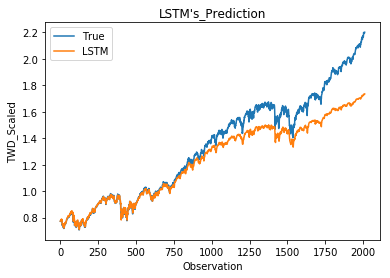

R-Squared: 0.853714


In [40]:
from sklearn.metrics import r2_score

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()



y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


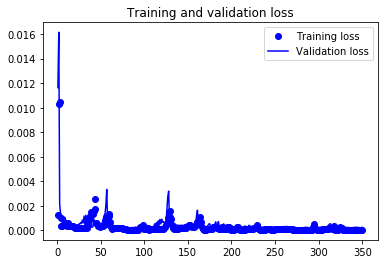

In [41]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_lsres_lsres_2l_50n.csv.csv', mode='w', header=True, index=False)

In [35]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K
from keras import Input,layers
from keras.models import Model
input_tensor = Input(shape=(1,X_train.shape[1],))
z=CuDNNLSTM(100,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
z=CuDNNLSTM(100,  return_sequences=False)(z)
t=CuDNNLSTM(100,  kernel_initializer='lecun_uniform', return_sequences=False)(input_tensor)
"""x = Dense(400, activation='relu')(z)
x = Dense(400, activation='relu')(x)
y = Dense(400, activation='relu')(z)"""

output=layers.concatenate([z,t], axis=-1)
output = Dense(100, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])



"""
model_lstm = Sequential()

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=64, verbose=1, shuffle=False)

"""

Train on 4547 samples, validate on 506 samples
Epoch 1/200
4547/4547 [==============================] - 1s 239us/step - loss: 0.0029 - val_loss: 0.0223
Epoch 2/200
4547/4547 [==============================] - 0s 82us/step - loss: 0.0043 - val_loss: 0.0054
Epoch 3/200
4547/4547 [==============================] - 0s 82us/step - loss: 5.9661e-04 - val_loss: 0.0037
Epoch 4/200
4547/4547 [==============================] - 0s 82us/step - loss: 1.6070e-04 - val_loss: 0.0035
Epoch 5/200
4547/4547 [==============================] - 0s 83us/step - loss: 1.3986e-04 - val_loss: 0.0039
Epoch 6/200
4547/4547 [==============================] - 0s 81us/step - loss: 1.3333e-04 - val_loss: 0.0043
Epoch 7/200
4547/4547 [==============================] - 0s 81us/step - loss: 1.3916e-04 - val_loss: 0.0047
Epoch 8/200
4547/4547 [==============================] - 0s 80us/step - loss: 1.4507e-04 - val_loss: 0.0051
Epoch 9/200
4547/4547 [==============================] - 0s 82us/step - loss: 1.4976e-04 - val_l

"\nmodel_lstm = Sequential()\n\nmodel_lstm.compile(loss='mean_squared_error', optimizer='adam')\nmodel_lstm.summary()\nearly_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)\nhistory_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=64, verbose=1, shuffle=False)\n\n"

The R2 score on the Train set is:	0.926
The Adjusted R2 score on the Train set is:	0.926

The R2 score on the Test set is:	-0.576
The Adjusted R2 score on the Test set is:	-0.578


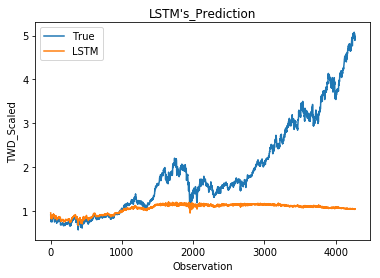

R-Squared: -0.576294


In [36]:
from sklearn.metrics import r2_score

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()



y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


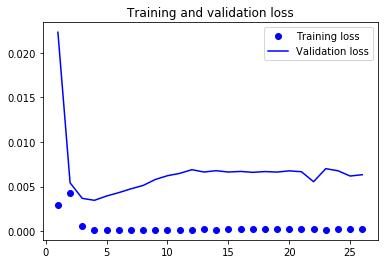

In [37]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_lsres_lsres_2l_100n.csv.csv', mode='w', header=True, index=False)

In [43]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

from keras.layers.advanced_activations import LeakyReLU
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K
from keras import Input,layers
from keras.models import Model
input_tensor = Input(shape=(1,X_train.shape[1],))
z=CuDNNLSTM(200,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
z=CuDNNLSTM(200,  return_sequences=False)(z)
t=CuDNNLSTM(200,  kernel_initializer='lecun_uniform', return_sequences=False)(input_tensor)
"""x = Dense(400, activation='relu')(z)
x = Dense(400, activation='relu')(x)
y = Dense(400, activation='relu')(z)"""

output=layers.concatenate([z,t], axis=-1)
output = Dense(200, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=350, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



"""
model_lstm = Sequential()

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=64, verbose=1, shuffle=False)

"""

Train on 6811 samples, validate on 757 samples
Epoch 1/350
6811/6811 [==============================] - 1s 204us/step - loss: 0.0014 - val_loss: 0.0038
Epoch 2/350
6811/6811 [==============================] - 1s 87us/step - loss: 0.0024 - val_loss: 0.0044
Epoch 3/350
6811/6811 [==============================] - 1s 87us/step - loss: 0.0025 - val_loss: 0.0021
Epoch 4/350
6811/6811 [==============================] - 1s 87us/step - loss: 0.0019 - val_loss: 0.0015
Epoch 5/350
6811/6811 [==============================] - 1s 88us/step - loss: 0.0016 - val_loss: 7.8740e-04
Epoch 6/350
6811/6811 [==============================] - 1s 87us/step - loss: 9.6251e-04 - val_loss: 5.8971e-04
Epoch 7/350
6811/6811 [==============================] - 1s 86us/step - loss: 0.0010 - val_loss: 4.1694e-04
Epoch 8/350
6811/6811 [==============================] - 1s 88us/step - loss: 7.1815e-04 - val_loss: 3.5118e-04
Epoch 9/350
6811/6811 [==============================] - 1s 88us/step - loss: 5.8689e-04 - val_l

6811/6811 [==============================] - 1s 87us/step - loss: 9.8907e-05 - val_loss: 2.6050e-04
Epoch 146/350
6811/6811 [==============================] - 1s 87us/step - loss: 1.5904e-04 - val_loss: 2.3751e-04
Epoch 147/350
6811/6811 [==============================] - 1s 87us/step - loss: 1.0890e-04 - val_loss: 2.2632e-04
Epoch 148/350
6811/6811 [==============================] - 1s 87us/step - loss: 4.1211e-05 - val_loss: 2.1781e-04
Epoch 149/350
6811/6811 [==============================] - 1s 86us/step - loss: 3.8875e-05 - val_loss: 2.0497e-04
Epoch 150/350
6811/6811 [==============================] - 1s 86us/step - loss: 3.5013e-05 - val_loss: 1.9607e-04
Epoch 151/350
6811/6811 [==============================] - 1s 87us/step - loss: 4.6560e-05 - val_loss: 1.9546e-04
Epoch 152/350
6811/6811 [==============================] - 1s 87us/step - loss: 9.5842e-05 - val_loss: 2.2843e-04
Epoch 153/350
6811/6811 [==============================] - 1s 87us/step - loss: 1.6130e-04 - val_loss:

Epoch 217/350
6811/6811 [==============================] - 1s 86us/step - loss: 3.9255e-05 - val_loss: 2.2446e-04
Epoch 218/350
6811/6811 [==============================] - 1s 88us/step - loss: 4.3982e-05 - val_loss: 2.0285e-04
Epoch 219/350
6811/6811 [==============================] - 1s 87us/step - loss: 4.4263e-05 - val_loss: 2.1178e-04
Epoch 220/350
6811/6811 [==============================] - 1s 87us/step - loss: 5.5230e-05 - val_loss: 1.9665e-04
Epoch 221/350
6811/6811 [==============================] - 1s 86us/step - loss: 6.4799e-05 - val_loss: 2.0968e-04
Epoch 222/350
6811/6811 [==============================] - 1s 87us/step - loss: 8.5542e-05 - val_loss: 2.0280e-04
Epoch 223/350
6811/6811 [==============================] - 1s 87us/step - loss: 1.0068e-04 - val_loss: 2.1208e-04
Epoch 224/350
6811/6811 [==============================] - 1s 88us/step - loss: 1.2702e-04 - val_loss: 2.0204e-04
Epoch 225/350
6811/6811 [==============================] - 1s 87us/step - loss: 2.0757e-

Epoch 289/350
6811/6811 [==============================] - 1s 85us/step - loss: 1.3803e-04 - val_loss: 2.4075e-04
Epoch 290/350
6811/6811 [==============================] - 1s 85us/step - loss: 1.8575e-04 - val_loss: 2.4433e-04
Epoch 291/350
6811/6811 [==============================] - 1s 85us/step - loss: 2.1890e-04 - val_loss: 2.5767e-04
Epoch 292/350
6811/6811 [==============================] - 1s 86us/step - loss: 2.0566e-04 - val_loss: 2.7802e-04
Epoch 293/350
6811/6811 [==============================] - 1s 86us/step - loss: 1.7889e-04 - val_loss: 2.0317e-04
Epoch 294/350
6811/6811 [==============================] - 1s 85us/step - loss: 7.1095e-04 - val_loss: 3.1218e-04
Epoch 295/350
6811/6811 [==============================] - 1s 87us/step - loss: 3.0108e-04 - val_loss: 2.3120e-04
Epoch 296/350
6811/6811 [==============================] - 1s 85us/step - loss: 4.9690e-04 - val_loss: 2.4138e-04
Epoch 297/350
6811/6811 [==============================] - 1s 85us/step - loss: 1.7983e-

"\nmodel_lstm = Sequential()\n\nmodel_lstm.compile(loss='mean_squared_error', optimizer='adam')\nmodel_lstm.summary()\nearly_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)\nhistory_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=64, verbose=1, shuffle=False)\n\n"

The R2 score on the Train set is:	0.999
The Adjusted R2 score on the Train set is:	0.999

The R2 score on the Test set is:	0.987
The Adjusted R2 score on the Test set is:	0.987


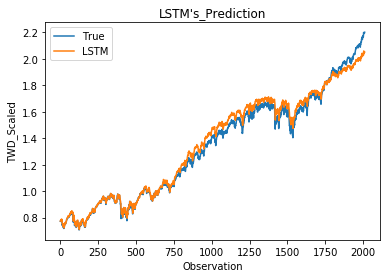

R-Squared: 0.986847


In [44]:
from sklearn.metrics import r2_score

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()



y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


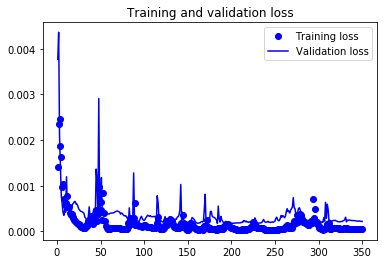

In [45]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_lsres_lsres_2l_200n.csv.csv', mode='w', header=True, index=False)

## 接下來使用LSTM

In [ ]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])



## 增加神經元為50

In [43]:
model_lstm = Sequential()
model_lstm.add(CuDNNLSTM(50, input_shape=(1, X_train.shape[1]), kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_10 (CuDNNLSTM)    (None, 50)                11400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
Train on 4547 samples, validate on 506 samples
Epoch 1/200
4547/4547 [==============================] - 1s 147us/step - loss: 0.0030 - val_loss: 0.0081
Epoch 2/200
4547/4547 [==============================] - 0s 47us/step - loss: 0.0137 - val_loss: 0.0012
Epoch 3/200
4547/4547 [==============================] - 0s 45us/step - loss: 5.7757e-04 - val_loss: 6.3305e-04
Epoch 4/200
4547/4547 [==============================] - 0s 45us/step - loss: 5.5734e-04 - val_loss: 5.6207e-04
Epoch 5/200
4547/4547 [==============================]

The R2 score on the Train set is:	0.997
The Adjusted R2 score on the Train set is:	0.997

The R2 score on the Test set is:	0.155
The Adjusted R2 score on the Test set is:	0.154


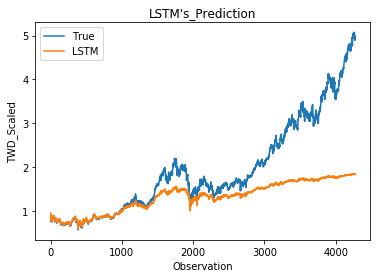

R-Squared: 0.154341


In [44]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

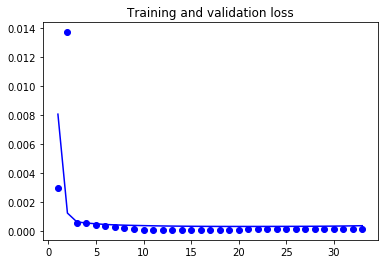

In [45]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [46]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_1l_50n.csv.csv', mode='w', header=True, index=False)

In [47]:
model_lstm = Sequential()
model_lstm.add(CuDNNLSTM(100, input_shape=(1, X_train.shape[1]), kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_11 (CuDNNLSTM)    (None, 100)               42800     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________
Train on 4547 samples, validate on 506 samples
Epoch 1/200
4547/4547 [==============================] - 1s 152us/step - loss: 0.0046 - val_loss: 0.0151
Epoch 2/200
4547/4547 [==============================] - 0s 47us/step - loss: 0.0100 - val_loss: 8.0326e-04
Epoch 3/200
4547/4547 [==============================] - 0s 45us/step - loss: 0.0014 - val_loss: 8.5369e-04
Epoch 4/200
4547/4547 [==============================] - 0s 43us/step - loss: 7.7106e-04 - val_loss: 6.9273e-04
Epoch 5/200
4547/4547 [==============================]

The R2 score on the Train set is:	0.974
The Adjusted R2 score on the Train set is:	0.974

The R2 score on the Test set is:	0.116
The Adjusted R2 score on the Test set is:	0.115


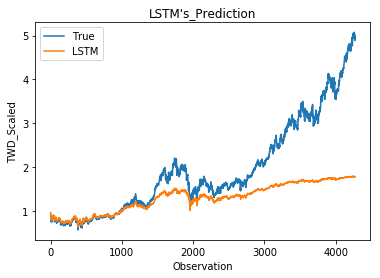

R-Squared: 0.115153


In [48]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

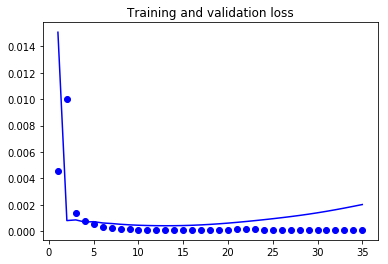

In [49]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [51]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_1l_100n.csv.csv', mode='w', header=True, index=False)

# 200 neurons

In [33]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
model_lstm = Sequential()
model_lstm.add(CuDNNLSTM(200, input_shape=(1, X_train.shape[1]), kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,validation_split= val_split_ratio,
                                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_4 (CuDNNLSTM)     (None, 200)               166400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 166,601
Trainable params: 166,601
Non-trainable params: 0
_________________________________________________________________
Train on 2263 samples, validate on 252 samples
Epoch 1/200
2263/2263 [==============================] - 0s 210us/step - loss: 0.0070 - val_loss: 0.0150
Epoch 2/200
2263/2263 [==============================] - 0s 47us/step - loss: 0.0142 - val_loss: 0.0144
Epoch 3/200
2263/2263 [==============================] - 0s 46us/step - loss: 0.0036 - val_loss: 0.0057
Epoch 4/200
2263/2263 [==============================] - 0s 48us/step - loss: 0.0013 - val_loss: 0.0017
Epoch 5/200
2263/2263 [==============================] - 0s 48us/ste

2263/2263 [==============================] - 0s 45us/step - loss: 1.4266e-04 - val_loss: 6.7159e-05
Epoch 143/200
2263/2263 [==============================] - 0s 45us/step - loss: 1.4150e-04 - val_loss: 6.6992e-05
Epoch 144/200
2263/2263 [==============================] - 0s 46us/step - loss: 1.4076e-04 - val_loss: 6.6693e-05
Epoch 145/200
2263/2263 [==============================] - 0s 45us/step - loss: 1.4021e-04 - val_loss: 6.6377e-05
Epoch 146/200
2263/2263 [==============================] - 0s 45us/step - loss: 1.3973e-04 - val_loss: 6.6099e-05
Epoch 147/200
2263/2263 [==============================] - 0s 44us/step - loss: 1.3929e-04 - val_loss: 6.5880e-05
Epoch 148/200
2263/2263 [==============================] - 0s 45us/step - loss: 1.3889e-04 - val_loss: 6.5737e-05
Epoch 149/200
2263/2263 [==============================] - 0s 43us/step - loss: 1.3855e-04 - val_loss: 6.5685e-05
Epoch 150/200
2263/2263 [==============================] - 0s 45us/step - loss: 1.3833e-04 - val_loss:

The R2 score on the Train set is:	0.995
The Adjusted R2 score on the Train set is:	0.995

The R2 score on the Test set is:	0.813
The Adjusted R2 score on the Test set is:	0.811


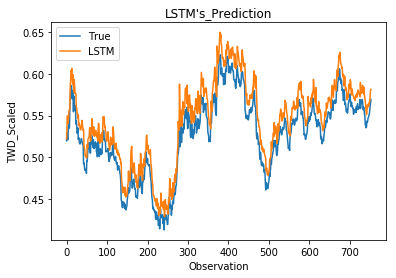

R-Squared: 0.790786


In [34]:

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

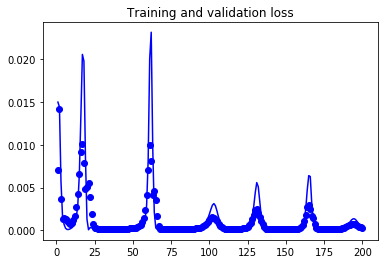

In [35]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [36]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_1l_200n.csv.csv', mode='w', header=True, index=False)

## 雙層LSTM

In [ ]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
X_tr_t.shape

In [ ]:
X_tst_t.shape

In [ ]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

model_lstm = Sequential()
model_lstm.add(CuDNNLSTM(50, input_shape=(1, X_train.shape[1]), kernel_initializer='lecun_uniform', return_sequences=True))
model_lstm.add(CuDNNLSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_2l_50n.csv.csv', mode='w', header=True, index=False)

In [ ]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

model_lstm = Sequential()
model_lstm.add(CuDNNLSTM(100, input_shape=(1, X_train.shape[1]), kernel_initializer='lecun_uniform', return_sequences=True))
model_lstm.add(CuDNNLSTM(100, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_2l_100n.csv.csv', mode='w', header=True, index=False)

In [ ]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

model_lstm = Sequential()
model_lstm.add(CuDNNLSTM(200, input_shape=(1, X_train.shape[1]), kernel_initializer='lecun_uniform', return_sequences=True))
model_lstm.add(CuDNNLSTM(200, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)


In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_2l_200n.csv.csv', mode='w', header=True, index=False)

In [ ]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

model_lstm = Sequential()
model_lstm.add(CuDNNLSTM(50, input_shape=(1, X_train.shape[1]), kernel_initializer='lecun_uniform',
                         return_sequences=True))
model_lstm.add(CuDNNLSTM(50, kernel_initializer='lecun_uniform',
                         return_sequences=True))
model_lstm.add(CuDNNLSTM(50, kernel_initializer='lecun_uniform',
                         return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,validation_split= val_split_ratio,
                                    shuffle=False)

#model.add(Dense(1))
#model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_3l_100n.csv.csv', mode='w', header=True, index=False)

In [ ]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

# custom R2-score metrics for keras backend
from keras import backend as K

model_lstm = Sequential()
model_lstm.add(CuDNNLSTM(100, input_shape=(1, X_train.shape[1]), kernel_initializer='lecun_uniform',
                         return_sequences=True))
model_lstm.add(CuDNNLSTM(100, kernel_initializer='lecun_uniform',
                         return_sequences=True))
model_lstm.add(CuDNNLSTM(100, kernel_initializer='lecun_uniform',
                         return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])


#model.add(Dense(1))
#model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_3l_100n.csv.csv', mode='w', header=True, index=False)

In [ ]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

# custom R2-score metrics for keras backend
from keras import backend as K

model_lstm = Sequential()
model_lstm.add(CuDNNLSTM(200, input_shape=(1, X_train.shape[1]), kernel_initializer='lecun_uniform',
                         return_sequences=True))
model_lstm.add(CuDNNLSTM(200, kernel_initializer='lecun_uniform',
                         return_sequences=True))
model_lstm.add(CuDNNLSTM(200, kernel_initializer='lecun_uniform',
                         return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])


#model.add(Dense(1))
#model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_3l_200n.csv.csv', mode='w', header=True, index=False)

# lstm+res 1ls_2lp

In [30]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

# custom R2-score metrics for keras backend
from keras import backend as K

input_tensor = Input(shape=(1,X_train.shape[1],))
z=CuDNNLSTM(50,   return_sequences=False)(input_tensor)
x = Dense(50, activation='relu')(z)
x = Dense(50, activation='relu')(x)
y = Dense(50, activation='relu')(z)

output=layers.concatenate([x,y], axis=-1)
#output =Dense(100, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error')
#model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)

#model.add(Dense(1))
#model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

Train on 6811 samples, validate on 757 samples
Epoch 1/200
6811/6811 [==============================] - 1s 218us/step - loss: 6.7485e-04 - val_loss: 0.0186
Epoch 2/200
6811/6811 [==============================] - 0s 52us/step - loss: 0.0189 - val_loss: 0.0112
Epoch 3/200
6811/6811 [==============================] - 0s 51us/step - loss: 0.0083 - val_loss: 0.0095
Epoch 4/200
6811/6811 [==============================] - 0s 52us/step - loss: 0.0045 - val_loss: 0.0060
Epoch 5/200
6811/6811 [==============================] - 0s 51us/step - loss: 0.0023 - val_loss: 0.0048
Epoch 6/200
6811/6811 [==============================] - 0s 51us/step - loss: 0.0015 - val_loss: 0.0039
Epoch 7/200
6811/6811 [==============================] - 0s 51us/step - loss: 0.0010 - val_loss: 0.0028
Epoch 8/200
6811/6811 [==============================] - 0s 51us/step - loss: 7.7130e-04 - val_loss: 0.0036
Epoch 9/200
6811/6811 [==============================] - 0s 51us/step - loss: 6.9087e-04 - val_loss: 0.0036
Epoc

6811/6811 [==============================] - 0s 50us/step - loss: 8.6646e-05 - val_loss: 4.6043e-04
Epoch 147/200
6811/6811 [==============================] - 0s 51us/step - loss: 8.6659e-05 - val_loss: 4.7666e-04
Epoch 148/200
6811/6811 [==============================] - 0s 51us/step - loss: 8.6378e-05 - val_loss: 4.7695e-04
Epoch 149/200
6811/6811 [==============================] - 0s 50us/step - loss: 8.6238e-05 - val_loss: 4.8820e-04
Epoch 150/200
6811/6811 [==============================] - 0s 51us/step - loss: 8.6304e-05 - val_loss: 4.8259e-04
Epoch 151/200
6811/6811 [==============================] - 0s 51us/step - loss: 8.6056e-05 - val_loss: 4.8607e-04
Epoch 152/200
6811/6811 [==============================] - 0s 51us/step - loss: 8.5966e-05 - val_loss: 4.8721e-04
Epoch 153/200
6811/6811 [==============================] - 0s 51us/step - loss: 8.5882e-05 - val_loss: 4.9373e-04
Epoch 154/200
6811/6811 [==============================] - 0s 50us/step - loss: 8.5698e-05 - val_loss:

The R2 score on the Train set is:	0.996
The Adjusted R2 score on the Train set is:	0.996

The R2 score on the Test set is:	0.878
The Adjusted R2 score on the Test set is:	0.878


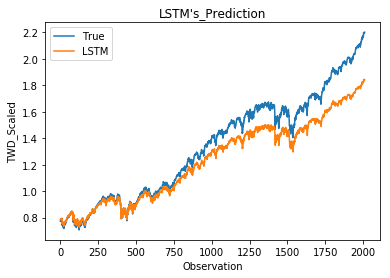

R-Squared: 0.876846


In [31]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

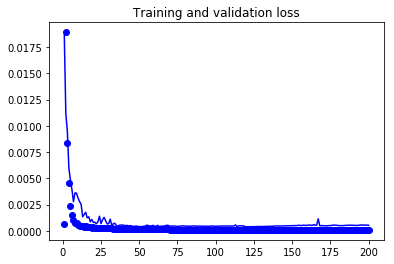

In [32]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [33]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_res_ls1l_res2l_50n.csv', mode='w', header=True, index=False)

In [34]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

# custom R2-score metrics for keras backend
from keras import backend as K

input_tensor = Input(shape=(1,X_train.shape[1],))
z=CuDNNLSTM(100,   return_sequences=False)(input_tensor)
x = Dense(100, activation='relu')(z)
x = Dense(100, activation='relu')(x)
y = Dense(100, activation='relu')(z)

output=layers.concatenate([x,y], axis=-1)
#output =Dense(100, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error')
#model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)

#model.add(Dense(1))
#model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

Train on 6811 samples, validate on 757 samples
Epoch 1/200
6811/6811 [==============================] - 1s 101us/step - loss: 7.8212e-04 - val_loss: 0.0175
Epoch 2/200
6811/6811 [==============================] - 0s 51us/step - loss: 0.0126 - val_loss: 0.0108
Epoch 3/200
6811/6811 [==============================] - 0s 51us/step - loss: 0.0060 - val_loss: 0.0084
Epoch 4/200
6811/6811 [==============================] - 0s 50us/step - loss: 0.0034 - val_loss: 0.0063
Epoch 5/200
6811/6811 [==============================] - 0s 50us/step - loss: 0.0021 - val_loss: 0.0062
Epoch 6/200
6811/6811 [==============================] - 0s 49us/step - loss: 0.0014 - val_loss: 0.0045
Epoch 7/200
6811/6811 [==============================] - 0s 50us/step - loss: 0.0010 - val_loss: 0.0044
Epoch 8/200
6811/6811 [==============================] - 0s 49us/step - loss: 8.5248e-04 - val_loss: 0.0037
Epoch 9/200
6811/6811 [==============================] - 0s 50us/step - loss: 7.6407e-04 - val_loss: 0.0037
Epoc

6811/6811 [==============================] - 0s 49us/step - loss: 1.0395e-04 - val_loss: 5.8095e-04
Epoch 147/200
6811/6811 [==============================] - 0s 50us/step - loss: 1.0457e-04 - val_loss: 6.2333e-04
Epoch 148/200
6811/6811 [==============================] - 0s 49us/step - loss: 1.0378e-04 - val_loss: 5.9051e-04
Epoch 149/200
6811/6811 [==============================] - 0s 51us/step - loss: 1.0427e-04 - val_loss: 5.7698e-04
Epoch 150/200
6811/6811 [==============================] - 0s 51us/step - loss: 1.0407e-04 - val_loss: 5.4442e-04
Epoch 151/200
6811/6811 [==============================] - 0s 51us/step - loss: 1.0854e-04 - val_loss: 5.3186e-04
Epoch 152/200
6811/6811 [==============================] - 0s 50us/step - loss: 1.0378e-04 - val_loss: 5.9763e-04
Epoch 153/200
6811/6811 [==============================] - 0s 49us/step - loss: 1.0410e-04 - val_loss: 6.3533e-04
Epoch 154/200
6811/6811 [==============================] - 0s 49us/step - loss: 1.0281e-04 - val_loss:

The R2 score on the Train set is:	0.995
The Adjusted R2 score on the Train set is:	0.995

The R2 score on the Test set is:	0.957
The Adjusted R2 score on the Test set is:	0.957


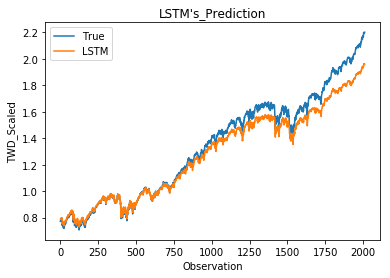

R-Squared: 0.956218


In [35]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

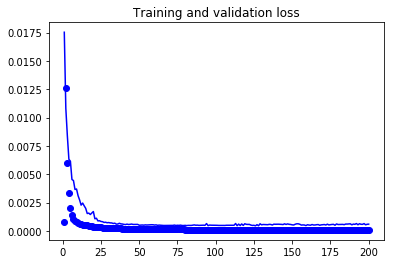

In [36]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [37]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_res_ls1l_res2l_100n.csv', mode='w', header=True, index=False)

In [ ]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

# custom R2-score metrics for keras backend
from keras import backend as K

input_tensor = Input(shape=(1,X_train.shape[1],))
z=CuDNNLSTM(100,   return_sequences=False)(input_tensor)
x = Dense(100, activation='relu')(z)
x = Dense(100, activation='relu')(x)
y = Dense(100, activation='relu')(z)

output=layers.concatenate([x,y], axis=-1)
#output =Dense(100, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error')
#model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)

#model.add(Dense(1))
#model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_1ls_2res_100n.csv.csv', mode='w', header=True, index=False)

In [ ]:
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K

# custom R2-score metrics for keras backend
from keras import backend as K

input_tensor = Input(shape=(1,X_train.shape[1],))
z=CuDNNLSTM(200,   return_sequences=False)(input_tensor)
x = Dense(200, activation='relu')(z)
x = Dense(200, activation='relu')(x)
y = Dense(200, activation='relu')(z)

output=layers.concatenate([x,y], axis=-1)
#output =Dense(100, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error')
#model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)

#model.add(Dense(1))
#model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

In [ ]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_res_ls1l_res2l_200n.csv', mode='w', header=True, index=False)

## lsres 

In [47]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

from keras.layers.advanced_activations import LeakyReLU
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K
from keras import Input,layers
from keras.models import Model
input_tensor = Input(shape=(1,X_train.shape[1],))
r=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
r=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(r)
r=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(r)
r=CuDNNLSTM(50,  return_sequences=False)(r)
v=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
v=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(v)
v=CuDNNLSTM(50,  return_sequences=False)(v)
z=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
z=CuDNNLSTM(50,  return_sequences=False)(z)
t=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=False)(input_tensor)
"""x = Dense(400, activation='relu')(z)
x = Dense(400, activation='relu')(x)
y = Dense(400, activation='relu')(z)"""

output=layers.concatenate([v,z,t], axis=-1)
output = Dense(50, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=500, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



Train on 6811 samples, validate on 757 samples
Epoch 1/500
6811/6811 [==============================] - 2s 315us/step - loss: 0.0039 - val_loss: 0.0302
Epoch 2/500
6811/6811 [==============================] - 1s 142us/step - loss: 0.0260 - val_loss: 0.0154
Epoch 3/500
6811/6811 [==============================] - 1s 138us/step - loss: 0.0101 - val_loss: 0.0022
Epoch 4/500
6811/6811 [==============================] - 1s 140us/step - loss: 6.9587e-04 - val_loss: 0.0015
Epoch 5/500
6811/6811 [==============================] - 1s 141us/step - loss: 3.8059e-04 - val_loss: 0.0012
Epoch 6/500
6811/6811 [==============================] - 1s 138us/step - loss: 2.7790e-04 - val_loss: 0.0011
Epoch 7/500
6811/6811 [==============================] - 1s 147us/step - loss: 2.6952e-04 - val_loss: 0.0011
Epoch 8/500
6811/6811 [==============================] - 1s 138us/step - loss: 2.9838e-04 - val_loss: 0.0010
Epoch 9/500
6811/6811 [==============================] - 1s 140us/step - loss: 3.6772e-04 - v

6811/6811 [==============================] - 1s 139us/step - loss: 1.6757e-04 - val_loss: 2.5104e-04
Epoch 146/500
6811/6811 [==============================] - 1s 140us/step - loss: 6.8901e-05 - val_loss: 5.4757e-04
Epoch 147/500
6811/6811 [==============================] - 1s 140us/step - loss: 3.1476e-04 - val_loss: 2.9468e-04
Epoch 148/500
6811/6811 [==============================] - 1s 138us/step - loss: 1.2334e-04 - val_loss: 4.8203e-04
Epoch 149/500
6811/6811 [==============================] - 1s 138us/step - loss: 4.2175e-04 - val_loss: 3.9062e-04
Epoch 150/500
6811/6811 [==============================] - 1s 139us/step - loss: 2.4367e-04 - val_loss: 3.3223e-04
Epoch 151/500
6811/6811 [==============================] - 1s 138us/step - loss: 4.3833e-04 - val_loss: 4.2204e-04
Epoch 152/500
6811/6811 [==============================] - 1s 138us/step - loss: 3.5688e-04 - val_loss: 4.6090e-04
Epoch 153/500
6811/6811 [==============================] - 1s 139us/step - loss: 3.7825e-04 - 

6811/6811 [==============================] - 1s 137us/step - loss: 1.4414e-04 - val_loss: 3.0146e-04
Epoch 288/500
6811/6811 [==============================] - 1s 141us/step - loss: 1.8348e-04 - val_loss: 3.8224e-04
Epoch 289/500
6811/6811 [==============================] - 1s 139us/step - loss: 2.4527e-04 - val_loss: 4.6999e-04
Epoch 290/500
6811/6811 [==============================] - 1s 139us/step - loss: 3.0637e-04 - val_loss: 6.2213e-04
Epoch 291/500
6811/6811 [==============================] - 1s 139us/step - loss: 2.9451e-04 - val_loss: 6.7361e-04
Epoch 292/500
6811/6811 [==============================] - 1s 138us/step - loss: 2.0646e-04 - val_loss: 2.5449e-04
Epoch 293/500
6811/6811 [==============================] - 1s 139us/step - loss: 2.1658e-04 - val_loss: 2.3657e-04
Epoch 294/500
6811/6811 [==============================] - 1s 138us/step - loss: 1.3156e-04 - val_loss: 2.6143e-04
Epoch 295/500
6811/6811 [==============================] - 1s 140us/step - loss: 4.0726e-05 - 

6811/6811 [==============================] - 1s 139us/step - loss: 6.7771e-05 - val_loss: 4.3250e-04
Epoch 359/500
6811/6811 [==============================] - 1s 139us/step - loss: 9.7396e-05 - val_loss: 2.6155e-04
Epoch 360/500
6811/6811 [==============================] - 1s 141us/step - loss: 1.8751e-04 - val_loss: 1.9479e-04
Epoch 361/500
6811/6811 [==============================] - 1s 139us/step - loss: 1.1850e-04 - val_loss: 2.1364e-04
Epoch 362/500
6811/6811 [==============================] - 1s 140us/step - loss: 5.1413e-05 - val_loss: 2.1955e-04
Epoch 363/500
6811/6811 [==============================] - 1s 139us/step - loss: 2.4417e-05 - val_loss: 1.9604e-04
Epoch 364/500
6811/6811 [==============================] - 1s 140us/step - loss: 3.6815e-05 - val_loss: 1.9714e-04
Epoch 365/500
6811/6811 [==============================] - 1s 139us/step - loss: 3.9315e-05 - val_loss: 2.2909e-04
Epoch 366/500
6811/6811 [==============================] - 1s 141us/step - loss: 3.3117e-05 - 

6811/6811 [==============================] - 1s 139us/step - loss: 3.7468e-05 - val_loss: 2.2529e-04


The R2 score on the Train set is:	0.999
The Adjusted R2 score on the Train set is:	0.999

The R2 score on the Test set is:	0.810
The Adjusted R2 score on the Test set is:	0.810


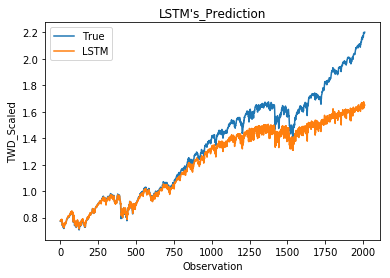

R-Squared: 0.808970


In [48]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

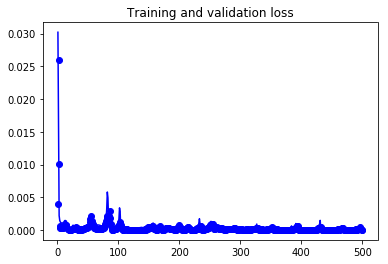

In [49]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [50]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_res_lsres_5l_100n.csv', mode='w', header=True, index=False)

# best model yet

In [29]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

from keras.layers.advanced_activations import LeakyReLU
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K
from keras import Input,layers
from keras.models import Model
input_tensor = Input(shape=(1,X_train.shape[1],))
r=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
r=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(r)
r=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(r)
r=CuDNNLSTM(250,  return_sequences=False)(r)
v=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
v=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(v)
v=CuDNNLSTM(250,  return_sequences=False)(v)
z=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
z=CuDNNLSTM(250,  return_sequences=False)(z)
t=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=False)(input_tensor)
"""x = Dense(400, activation='relu')(z)
x = Dense(400, activation='relu')(x)
y = Dense(400, activation='relu')(z)"""

output=layers.concatenate([v,z,t], axis=-1)
output = Dense(250, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=500, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



Train on 6811 samples, validate on 757 samples
Epoch 1/500
6811/6811 [==============================] - 5s 663us/step - loss: 0.0021 - val_loss: 0.0045
Epoch 2/500
6811/6811 [==============================] - 1s 176us/step - loss: 0.0028 - val_loss: 0.0059
Epoch 3/500
6811/6811 [==============================] - 1s 171us/step - loss: 0.0022 - val_loss: 0.0025
Epoch 4/500
6811/6811 [==============================] - 1s 168us/step - loss: 8.0591e-04 - val_loss: 0.0025
Epoch 5/500
6811/6811 [==============================] - 1s 168us/step - loss: 2.3130e-04 - val_loss: 0.0012
Epoch 6/500
6811/6811 [==============================] - 1s 168us/step - loss: 7.6108e-05 - val_loss: 9.8390e-04
Epoch 7/500
6811/6811 [==============================] - 1s 168us/step - loss: 1.0803e-04 - val_loss: 7.5659e-04
Epoch 8/500
6811/6811 [==============================] - 1s 169us/step - loss: 1.3159e-04 - val_loss: 5.8358e-04
Epoch 9/500
6811/6811 [==============================] - 1s 167us/step - loss: 1.

6811/6811 [==============================] - 1s 168us/step - loss: 2.1369e-04 - val_loss: 2.2451e-04
Epoch 144/500
6811/6811 [==============================] - 1s 169us/step - loss: 1.8908e-04 - val_loss: 3.0415e-04
Epoch 145/500
6811/6811 [==============================] - 1s 169us/step - loss: 1.6933e-04 - val_loss: 2.6103e-04
Epoch 146/500
6811/6811 [==============================] - 1s 169us/step - loss: 1.4262e-04 - val_loss: 2.8128e-04
Epoch 147/500
6811/6811 [==============================] - 1s 171us/step - loss: 1.1945e-04 - val_loss: 2.5437e-04
Epoch 148/500
6811/6811 [==============================] - 1s 169us/step - loss: 8.5344e-05 - val_loss: 2.6273e-04
Epoch 149/500
6811/6811 [==============================] - 1s 168us/step - loss: 8.4274e-05 - val_loss: 2.4578e-04
Epoch 150/500
6811/6811 [==============================] - 1s 168us/step - loss: 6.3871e-05 - val_loss: 2.6280e-04
Epoch 151/500
6811/6811 [==============================] - 1s 169us/step - loss: 7.9326e-05 - 

6811/6811 [==============================] - 1s 169us/step - loss: 2.3133e-05 - val_loss: 1.8446e-04
Epoch 286/500
6811/6811 [==============================] - 1s 168us/step - loss: 2.3109e-05 - val_loss: 1.7903e-04
Epoch 287/500
6811/6811 [==============================] - 1s 168us/step - loss: 2.2913e-05 - val_loss: 1.9323e-04
Epoch 288/500
6811/6811 [==============================] - 1s 169us/step - loss: 2.2633e-05 - val_loss: 1.7920e-04
Epoch 289/500
6811/6811 [==============================] - 1s 169us/step - loss: 2.5433e-05 - val_loss: 1.8788e-04
Epoch 290/500
6811/6811 [==============================] - 1s 166us/step - loss: 2.4833e-05 - val_loss: 2.1802e-04
Epoch 291/500
6811/6811 [==============================] - 1s 169us/step - loss: 2.5181e-05 - val_loss: 2.5898e-04
Epoch 292/500
6811/6811 [==============================] - 1s 168us/step - loss: 3.5177e-05 - val_loss: 2.3552e-04
Epoch 293/500
6811/6811 [==============================] - 1s 168us/step - loss: 5.8961e-05 - 

6811/6811 [==============================] - 1s 168us/step - loss: 2.8539e-05 - val_loss: 2.4565e-04
Epoch 428/500
6811/6811 [==============================] - 1s 168us/step - loss: 2.9035e-05 - val_loss: 2.2943e-04
Epoch 429/500
6811/6811 [==============================] - 1s 169us/step - loss: 2.9931e-05 - val_loss: 2.2903e-04
Epoch 430/500
6811/6811 [==============================] - 1s 169us/step - loss: 3.0334e-05 - val_loss: 2.3418e-04
Epoch 431/500
6811/6811 [==============================] - 1s 169us/step - loss: 3.1513e-05 - val_loss: 2.4818e-04
Epoch 432/500
6811/6811 [==============================] - 1s 169us/step - loss: 3.1734e-05 - val_loss: 2.6354e-04
Epoch 433/500
6811/6811 [==============================] - 1s 168us/step - loss: 3.0593e-05 - val_loss: 2.6517e-04
Epoch 434/500
6811/6811 [==============================] - 1s 169us/step - loss: 2.9862e-05 - val_loss: 2.5718e-04
Epoch 435/500
6811/6811 [==============================] - 1s 168us/step - loss: 2.8738e-05 - 

The R2 score on the Train set is:	0.992
The Adjusted R2 score on the Train set is:	0.992

The R2 score on the Test set is:	0.977
The Adjusted R2 score on the Test set is:	0.977


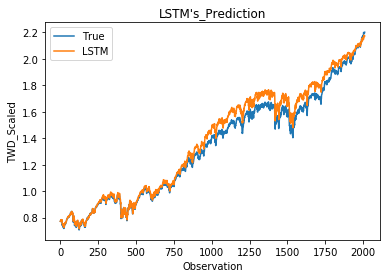

R-Squared: 0.976454


In [30]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

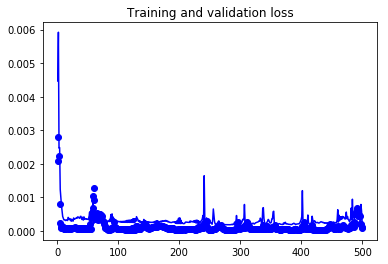

In [31]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [32]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_res_lsres_5l_250n.csv', mode='w', header=True, index=False)

In [35]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

from keras.layers.advanced_activations import LeakyReLU
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K
from keras import Input,layers
from keras.models import Model
input_tensor = Input(shape=(1,X_train.shape[1],))
q=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
q=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(q)
q=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(q)
q=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(q)
q=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(q)
q=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(q)
q=CuDNNLSTM(50,  return_sequences=False)(q)
w=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
w=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(w)
w=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(w)
w=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(w)
w=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(w)
w=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(w)
w=CuDNNLSTM(50,  return_sequences=False)(w)
e=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
e=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(e)
e=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(e)
e=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(e)
e=CuDNNLSTM(50,  return_sequences=False)(e)
r=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
r=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(r)
r=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(r)
r=CuDNNLSTM(50,  return_sequences=False)(r)
v=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
v=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(v)
v=CuDNNLSTM(50,  return_sequences=False)(v)
z=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
z=CuDNNLSTM(50,  return_sequences=False)(z)
t=CuDNNLSTM(50,  kernel_initializer='lecun_uniform', return_sequences=False)(input_tensor)
"""x = Dense(400, activation='relu')(z)
x = Dense(400, activation='relu')(x)
y = Dense(400, activation='relu')(z)"""

output=layers.concatenate([q,w,e,r,v,z,t], axis=-1)
output = Dense(50, activation='relu')(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=500, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



Train on 6811 samples, validate on 757 samples
Epoch 1/500
6811/6811 [==============================] - 12s 2ms/step - loss: 0.0011 - val_loss: 0.0097
Epoch 2/500
6811/6811 [==============================] - 7s 1ms/step - loss: 0.0043 - val_loss: 0.0116
Epoch 3/500
6811/6811 [==============================] - 7s 1ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 4/500
6811/6811 [==============================] - 7s 1ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 5/500
6811/6811 [==============================] - 7s 1ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/500
6811/6811 [==============================] - 7s 1ms/step - loss: 9.3793e-04 - val_loss: 6.2674e-04
Epoch 7/500
6811/6811 [==============================] - 7s 1ms/step - loss: 0.0010 - val_loss: 4.9413e-04
Epoch 8/500
6811/6811 [==============================] - 7s 1ms/step - loss: 5.4342e-04 - val_loss: 4.2487e-04
Epoch 9/500
6811/6811 [==============================] - 7s 1ms/step - loss: 2.7142e-04 - val_loss: 3.8313e-

Epoch 147/500
6811/6811 [==============================] - 7s 1ms/step - loss: 6.8041e-05 - val_loss: 2.9149e-04
Epoch 148/500
6811/6811 [==============================] - 7s 1ms/step - loss: 7.3996e-05 - val_loss: 2.9014e-04
Epoch 149/500
6811/6811 [==============================] - 7s 1ms/step - loss: 8.2659e-05 - val_loss: 2.9044e-04
Epoch 150/500
6811/6811 [==============================] - 7s 1ms/step - loss: 1.0182e-04 - val_loss: 2.9380e-04
Epoch 151/500
6811/6811 [==============================] - 7s 1ms/step - loss: 9.3463e-05 - val_loss: 2.7643e-04
Epoch 152/500
6811/6811 [==============================] - 7s 1ms/step - loss: 8.4026e-05 - val_loss: 2.6880e-04
Epoch 153/500
6811/6811 [==============================] - 7s 1ms/step - loss: 8.1655e-05 - val_loss: 2.8902e-04
Epoch 154/500
6811/6811 [==============================] - 7s 1ms/step - loss: 7.2277e-05 - val_loss: 2.8469e-04
Epoch 155/500
6811/6811 [==============================] - 7s 1ms/step - loss: 8.9824e-05 - val_

6811/6811 [==============================] - 7s 1ms/step - loss: 3.9900e-05 - val_loss: 2.1971e-04
Epoch 292/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.9605e-05 - val_loss: 2.1915e-04
Epoch 293/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.9215e-05 - val_loss: 2.1852e-04
Epoch 294/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.8744e-05 - val_loss: 2.1754e-04
Epoch 295/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.8850e-05 - val_loss: 2.1788e-04
Epoch 296/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.8898e-05 - val_loss: 2.1846e-04
Epoch 297/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.8742e-05 - val_loss: 2.1865e-04
Epoch 298/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.8569e-05 - val_loss: 2.1847e-04
Epoch 299/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.8456e-05 - val_loss: 2.1809e-

6811/6811 [==============================] - 7s 1ms/step - loss: 3.2419e-05 - val_loss: 1.9815e-04
Epoch 436/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.2387e-05 - val_loss: 1.9810e-04
Epoch 437/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.2359e-05 - val_loss: 1.9804e-04
Epoch 438/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.2332e-05 - val_loss: 1.9788e-04
Epoch 439/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.2310e-05 - val_loss: 1.9782e-04
Epoch 440/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.2297e-05 - val_loss: 1.9767e-04
Epoch 441/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.2246e-05 - val_loss: 1.9751e-04
Epoch 442/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.2202e-05 - val_loss: 1.9732e-04
Epoch 443/500
6811/6811 [==============================] - 7s 1ms/step - loss: 3.2174e-05 - val_loss: 1.9713e-

The R2 score on the Train set is:	0.999
The Adjusted R2 score on the Train set is:	0.999

The R2 score on the Test set is:	0.756
The Adjusted R2 score on the Test set is:	0.756


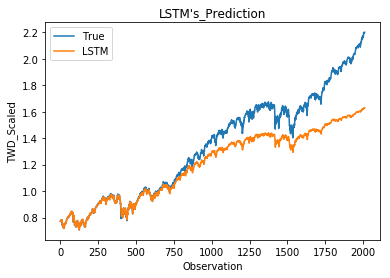

R-Squared: 0.754932


In [36]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

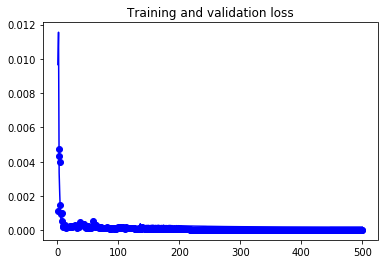

In [37]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [38]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_res_lsres_7l_50n.csv', mode='w', header=True, index=False)

In [ ]:
#prelu

In [32]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

from keras.layers.advanced_activations import LeakyReLU
from keras.layers import CuDNNLSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
import keras.backend as K
from keras import Input,layers
from keras.models import Model

pre = PReLU(alpha_initializer='zeros')
input_tensor = Input(shape=(1,X_train.shape[1],))
r=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
r= PReLU(alpha_initializer='zeros')(r)
r=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(r)
r= PReLU(alpha_initializer='zeros')(r)
r=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(r)
r= PReLU(alpha_initializer='zeros')(r)
r=CuDNNLSTM(250,  return_sequences=False)(r)
r= PReLU(alpha_initializer='zeros')(r)
v=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
v= PReLU(alpha_initializer='zeros')(v)
v=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(v)
v= PReLU(alpha_initializer='zeros')(v)
v=CuDNNLSTM(250,  return_sequences=False)(v)
v= PReLU(alpha_initializer='zeros')(v)
z=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=True)(input_tensor)
z= PReLU(alpha_initializer='zeros')(z)
z=CuDNNLSTM(250,  return_sequences=False)(z)
z= PReLU(alpha_initializer='zeros')(z)
t=CuDNNLSTM(250,  kernel_initializer='lecun_uniform', return_sequences=False)(input_tensor)
t= PReLU(alpha_initializer='zeros')(t)

"""x = Dense(400, activation='relu')(z)
x = Dense(400, activation='relu')(x)
y = Dense(400, activation='relu')(z)"""

output=layers.concatenate([v,z,t], axis=-1)
output = PReLU(alpha_initializer='zeros',input_shape=(1,250l))(output)
output_tensor = Dense(1)(output)


model_lstm = Model(input_tensor, output_tensor)
model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, 
                                    batch_size=64, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=500, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\keras\activations.py:197: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 6811 samples, validate on 757 samples
Epoch 1/500
6811/6811 [==============================] - 4s 585us/step - loss: 5.8225e-04 - val_loss: 0.0020
Epoch 2/500
6811/6811 [==============================] - 2s 351us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/500
6811/6811 [==============================] - 2s 352us/step - loss: 7.3903e-04 - val_loss: 9.9684e-04
Epoch 4/500
6811/6811 [==============================] - 2s 350us/step - loss: 2.3281e-04 - val_loss: 7.2686e-04
Epoch 5/500
6811/6811 [==============================] - 2s 352us/step - loss: 7.3200e-05 - val_loss: 5.8531e-04
Epoch 6/500
6811/6811 [==============================] - 2s 353us/step - loss: 6.1620e-05 - val_loss: 4.7399e-04
Epoch 7/500
6811/6811 [==============================] - 2s 349us/step - loss: 7.0277e-05 - val_loss: 3.9607e-04
Epoch 8/500
6811/6811 [==============================] - 2s 350us/step - loss: 5.9508e-05 - val_loss: 4.4550e-04
Epoch 9/500
6811/6811 [==============================] - 2s 3

Epoch 73/500
6811/6811 [==============================] - 2s 352us/step - loss: 8.5753e-05 - val_loss: 2.4074e-04
Epoch 74/500
6811/6811 [==============================] - 2s 351us/step - loss: 6.8686e-05 - val_loss: 2.3513e-04
Epoch 75/500
6811/6811 [==============================] - 2s 350us/step - loss: 6.4261e-05 - val_loss: 2.3560e-04
Epoch 76/500
6811/6811 [==============================] - 2s 351us/step - loss: 5.4529e-05 - val_loss: 2.3335e-04
Epoch 77/500
6811/6811 [==============================] - 2s 350us/step - loss: 5.2219e-05 - val_loss: 2.3277e-04
Epoch 78/500
6811/6811 [==============================] - 2s 351us/step - loss: 4.7756e-05 - val_loss: 2.3107e-04
Epoch 79/500
6811/6811 [==============================] - 2s 351us/step - loss: 4.6702e-05 - val_loss: 2.2868e-04
Epoch 80/500
6811/6811 [==============================] - 2s 350us/step - loss: 4.5425e-05 - val_loss: 2.2629e-04
Epoch 81/500
6811/6811 [==============================] - 2s 351us/step - loss: 4.5690e-

6811/6811 [==============================] - 2s 350us/step - loss: 3.2964e-05 - val_loss: 1.9873e-04
Epoch 216/500
6811/6811 [==============================] - 2s 351us/step - loss: 3.3141e-05 - val_loss: 1.9928e-04
Epoch 217/500
6811/6811 [==============================] - 2s 348us/step - loss: 3.3376e-05 - val_loss: 1.9891e-04
Epoch 218/500
6811/6811 [==============================] - 2s 350us/step - loss: 3.3375e-05 - val_loss: 2.0018e-04
Epoch 219/500
6811/6811 [==============================] - 2s 351us/step - loss: 3.3769e-05 - val_loss: 1.9728e-04
Epoch 220/500
6811/6811 [==============================] - 2s 351us/step - loss: 3.2553e-05 - val_loss: 1.9925e-04
Epoch 221/500
6811/6811 [==============================] - 2s 350us/step - loss: 3.3765e-05 - val_loss: 1.9796e-04
Epoch 222/500
6811/6811 [==============================] - 2s 353us/step - loss: 3.3074e-05 - val_loss: 1.9923e-04
Epoch 223/500
6811/6811 [==============================] - 2s 352us/step - loss: 3.3454e-05 - 

6811/6811 [==============================] - 2s 353us/step - loss: 3.6048e-05 - val_loss: 1.9729e-04
Epoch 358/500
6811/6811 [==============================] - 2s 350us/step - loss: 3.6175e-05 - val_loss: 1.9570e-04
Epoch 359/500
6811/6811 [==============================] - 2s 351us/step - loss: 3.5281e-05 - val_loss: 1.9563e-04
Epoch 360/500
6811/6811 [==============================] - 2s 354us/step - loss: 3.5630e-05 - val_loss: 1.9506e-04
Epoch 361/500
6811/6811 [==============================] - 2s 351us/step - loss: 3.4887e-05 - val_loss: 2.0009e-04
Epoch 362/500
6811/6811 [==============================] - 2s 351us/step - loss: 3.5869e-05 - val_loss: 1.9414e-04
Epoch 363/500
6811/6811 [==============================] - 2s 349us/step - loss: 3.4342e-05 - val_loss: 1.9798e-04
Epoch 364/500
6811/6811 [==============================] - 2s 352us/step - loss: 3.4534e-05 - val_loss: 1.9492e-04
Epoch 365/500
6811/6811 [==============================] - 2s 352us/step - loss: 3.2797e-05 - 

6811/6811 [==============================] - 2s 352us/step - loss: 2.5111e-05 - val_loss: 2.2328e-04
Epoch 500/500
6811/6811 [==============================] - 2s 351us/step - loss: 2.5474e-05 - val_loss: 2.2336e-04


The R2 score on the Train set is:	0.999
The Adjusted R2 score on the Train set is:	0.999

The R2 score on the Test set is:	0.732
The Adjusted R2 score on the Test set is:	0.732


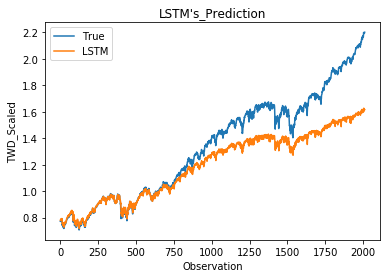

R-Squared: 0.730418


In [33]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()

y_pred_shift = np.roll(y_pred_test_lstm,1)
y_test1 = y_test[1:]
y_pred_shift = y_pred_shift[1:]
print('R-Squared: %f'%(r2_score(y_test1, y_pred_shift)))

dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

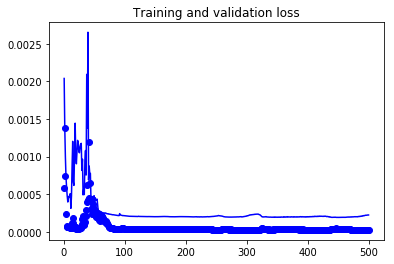

In [34]:
import matplotlib.pyplot as plt
print(history_model_lstm.history.keys())

loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [35]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred_test_lstm), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred_test_lstm[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = np.delete(test_date, 0)

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, test_date_trim.size - 1)

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//will5000_ls_res_lsres_4l_100n_prelu.csv', mode='w', header=True, index=False)